In [1]:
# Importing necessary libraries
import pandas as pd

In [2]:
# Loading the dataset
file_path = 'C:/Users/SkillCircle/Desktop/Projects/Cap 3 Netflix Data Analytics/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

In [3]:
# Displaying the first few rows of the dataset to understand its structure
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB




### Data Exploration:
The dataset contains 8,807 entries with 12 columns. The columns include:
- `show_id`: A unique identifier for each show.
- `type`: Whether the content is a "Movie" or "TV Show."
- `title`: The title of the content.
- `director`: The director of the content (contains missing values).
- `cast`: The main cast of the content (contains missing values).
- `country`: The country of origin (contains missing values).
- `date_added`: The date the content was added to Netflix (contains missing values).
- `release_year`: The year the content was released.
- `rating`: The content rating (contains missing values).
- `duration`: The duration of the content (either in minutes for movies or seasons for TV shows).
- `listed_in`: The genres or categories the content is listed under.
- `description`: A brief descriptioe, or let me know if you'd like to focus on something else!

### Next Steps:
1. **Data Cleaning:**
   - Handle missing values.
   - Remove duplicate entries.
   - Correct any inconsistencies in the data.

2. **Descriptive Statistics:**
   - Compute basic descriptive statistics.

3. **Data Visualization:**
   - Visualize various aspects of the data.

I'll proceed with data cleaning next.

### Data Cleaning:

1. **Missing Values:**
   - `director`: 2,634 missing values.
   - `cast`: 825 missing values.
   - `country`: 831 missing values.
   - `date_added`: 10 missing values.
   - `rating`: 4 missing values.
   - `duration`: 3 missing values.

In [5]:
# Checking for missing values in the dataset
missing_values = netflix_data.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

2. **Duplicates:**
   - There are no duplicate entries.

In [6]:
# Checking for duplicate entries
duplicates = netflix_data.duplicated().sum()
duplicates

0


**Approach for Missing Values:**
- For `director`, `cast`, and `country`, I will replace missing values with `"Unknown"` since these are categorical fields.
- For `date_added`, `rating`, and `duration`, I will drop rows with missing values as they represent a small percentage of the total data.

I'll now clean the dataset based on the above plan.

In [7]:
# Handling missing values by replacing with "Unknown" for categorical fields
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

# Dropping rows with missing values in 'date_added', 'rating', and 'duration' columns
netflix_data.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [8]:
# Verifying that missing values are handled
cleaned_missing_values = netflix_data.isnull().sum()

cleaned_missing_values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Data Cleaning Summary:
All missing values have been addressed. Categorical fields (`director`, `cast`, `country`) have been filled with `"Unknown"`, and rows with missing values in `date_added`, `rating`, and `duration` have been removed. The dataset is now clean and ready for further analysis.

Next, I'll compute basic descriptive statistics to understand the central tendencies and variability of relevant variables.

In [10]:
# Computing descriptive statistics for the numerical columns
descriptive_stats = netflix_data.describe()

# Displaying the descriptive statistics
descriptive_stats

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

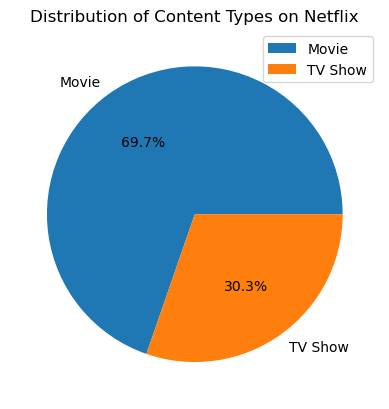

In [12]:
plt.pie(netflix_data["type"].value_counts(), labels=netflix_data["type"].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Content Types on Netflix')
plt.legend()
plt.show()

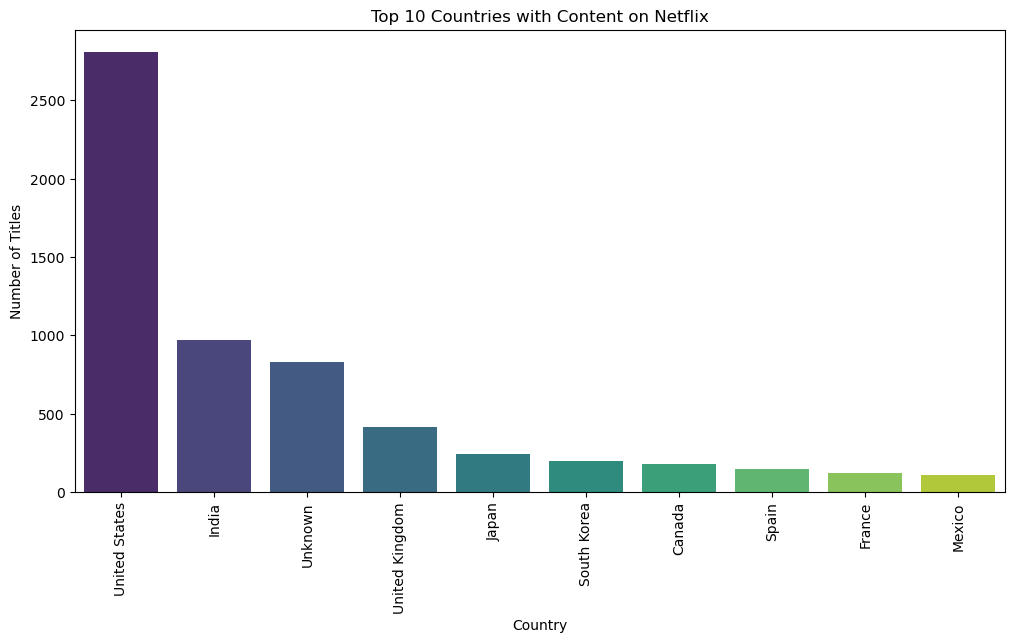

In [13]:
top_countries = netflix_data['country'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x="country", data=netflix_data[netflix_data['country'].isin(top_countries)], order=top_countries, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

In [14]:
netflix_data["director"].unique()

array(['Kirsten Johnson', 'Unknown', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [15]:
netflix_data["director"].value_counts().head(10)

director
Unknown                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: count, dtype: int64

In [15]:
group_by1=netflix_data.groupby("cast")["rating"].count().sort_values(ascending=False).head(10)
group_by1

cast
Unknown                                                                                                                   825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
David Spade, London Hughes, Fortune Feimster                                                                                6
Craig Sechler                                                                                                    

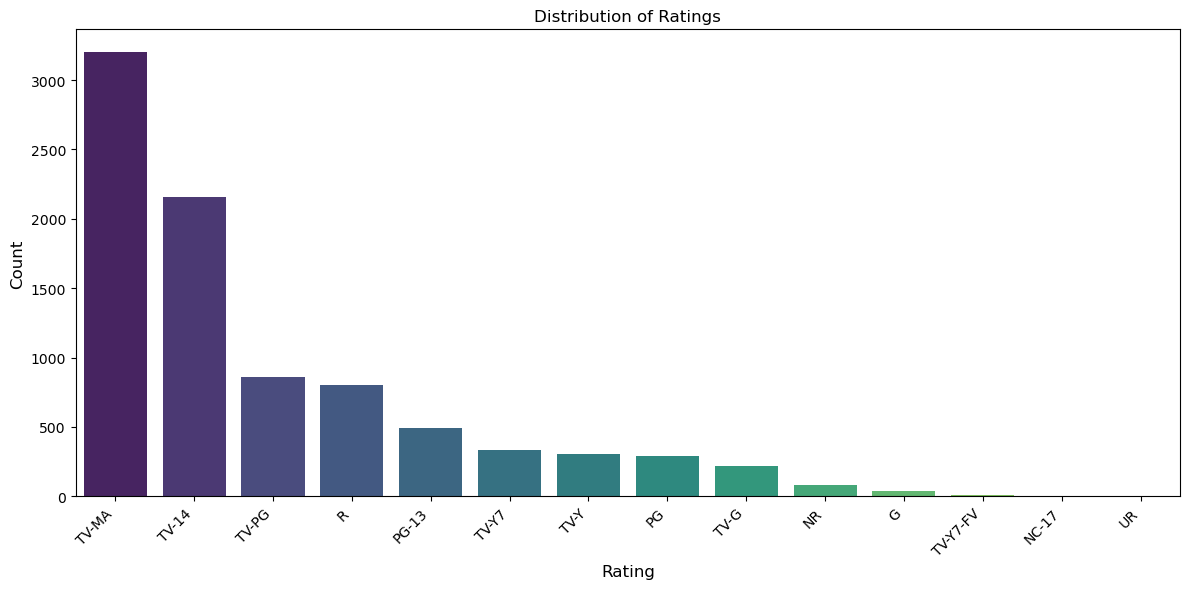

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x="rating", data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
netflix_data["duration"].value_counts().head(10)

duration
1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64


### Steps for Data Visualization and Time Series Analysis:

#### 1. **Distribution of Content Over Different Genres:**
   - Split the `listed_in` column, as it contains multiple genres/categories for each show.
   - Create a bar plot to show the distribution of content across genres.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the 'listed_in' column to extract individual genres
netflix_data['genres'] = netflix_data['listed_in'].str.split(', ')

# Exploding the genres into separate rows
genres_data = netflix_data.explode('genres')

# Plotting the distribution of content over different genres
plt.figure(figsize=(10, 6))
sns.countplot(y='genres', data=genres_data, order=genres_data['genres'].value_counts().index)
plt.title('Distribution of Content Over Different Genres')
plt.xlabel('Number of Titles')
plt.ylabel(' you have any questions or need further assistance, feel free to ask!

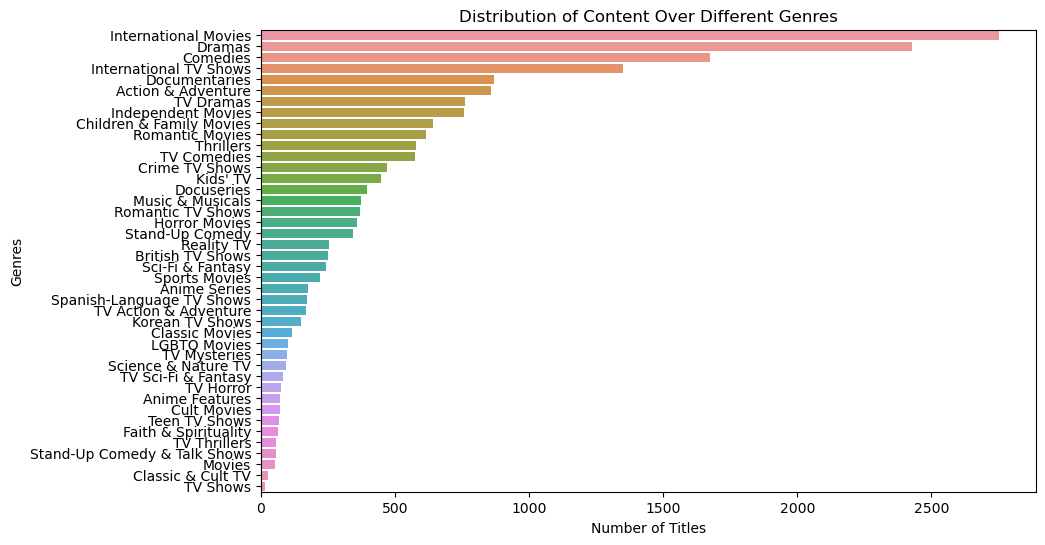

In [18]:
# Splitting the 'listed_in' column to extract individual genres
netflix_data['genres'] = netflix_data['listed_in'].str.split(', ')

# Exploding the genres into separate rows
genres_data = netflix_data.explode('genres')

# Plotting the distribution of content over different genres
plt.figure(figsize=(10, 6))
sns.countplot(y='genres', data=genres_data, order=genres_data['genres'].value_counts().index)
plt.title('Distribution of Content Over Different Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()

#### 2. **Distribution of Content Across Release Years:**
   - Use a histogram or bar plot to visualize the distribution of content across release years.

```python
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], bins=20, kde=False)
plt.title('Distribution of Content Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()
```

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


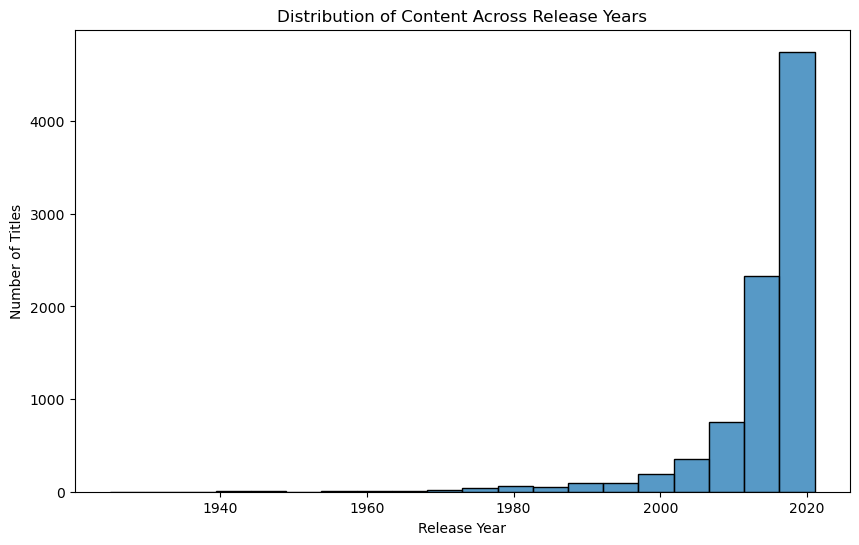

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], bins=20, kde=False)
plt.title('Distribution of Content Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

#### 3. **Geographical Distribution of Content:**
   - Create a bar plot to show the distribution of content across countries.

```python
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=netflix_data, order=netflix_data['country'].value_counts().index[:10])
plt.title('Geographical Distribution of Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()
```

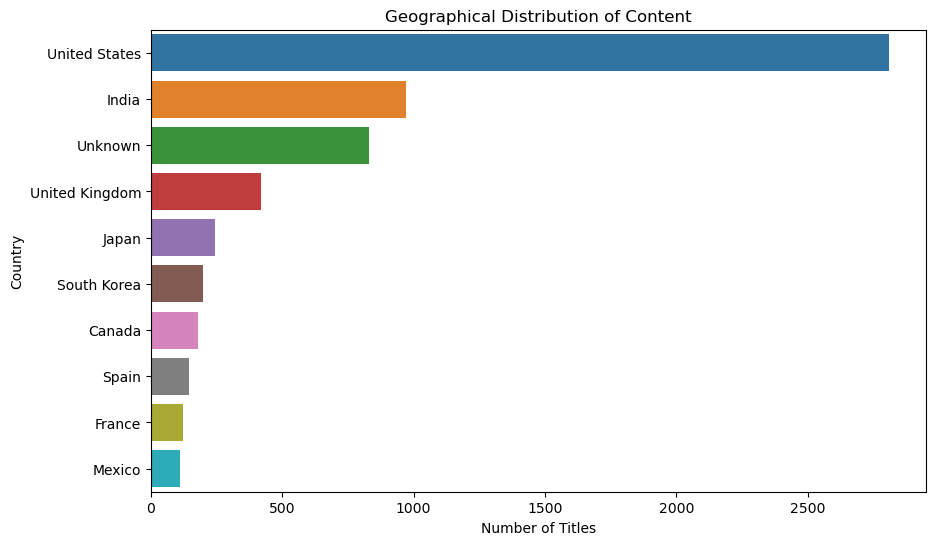

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=netflix_data, order=netflix_data['country'].value_counts().index[:10])
plt.title('Geographical Distribution of Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

#### 4. **Time Series Analysis:**
   - Convert the `date_added` column to datetime format and plot the number of titles added over time.

```python
# Converting 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Creating a time series plot of content added over time
plt.figure(figsize=(10, 6))
netflix_data['date_added'].dt.year.value_counts().sort_index().plot(kind='line')
plt.title('Number of Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()
```

C:\Users\SkillCircle\AppData\Local\Temp\ipykernel_1560\3041019635.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])


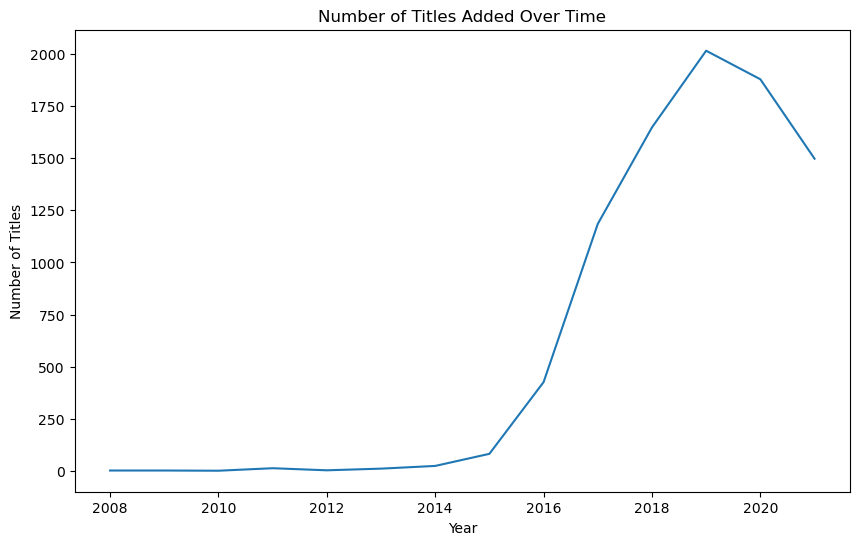

In [17]:
# Converting 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Creating a time series plot of content added over time
plt.figure(figsize=(10, 6))
netflix_data['date_added'].dt.year.value_counts().sort_index().plot(kind='line')
plt.title('Number of Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

### 1. **Content Analysis - Part 1: Analyze the Distribution of Content Ratings**
   - Create a bar plot to visualize the distribution of content ratings.

```python
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()
```

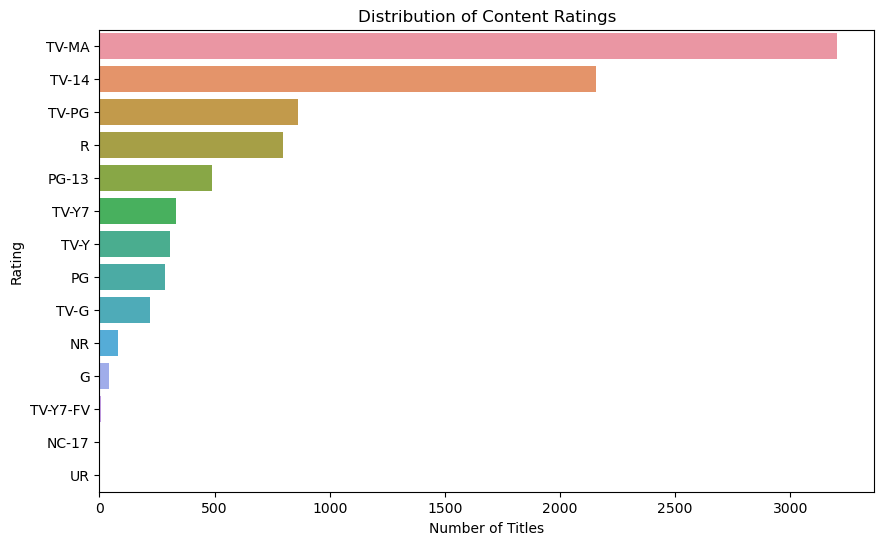

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()

### 2. **Content Analysis - Part 2: Explore the Length of Movies or Episodes**
   - Separate the `duration` column into numerical values and units (minutes/seasons).
   - Plot the distribution of movie lengths and episode counts for TV shows.

```python
# Splitting the duration into numeric value and units (minutes or seasons)
netflix_data['duration_value'] = netflix_data['duration'].str.extract('(\d+)').astype(int)
netflix_data['duration_unit'] = netflix_data['duration'].str.extract('([a-zA-Z]+)')

# Plotting the distribution of movie lengths
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data[netflix_data['type'] == 'Movie']['duration_value'], bins=20, kde=True)
plt.title('Distribution of Movie Lengths')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.show()

# Plotting the distribution of TV show seasons
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data[netflix_data['type'] == 'TV Show']['duration_value'], bins=10, kde=True)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()
```

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


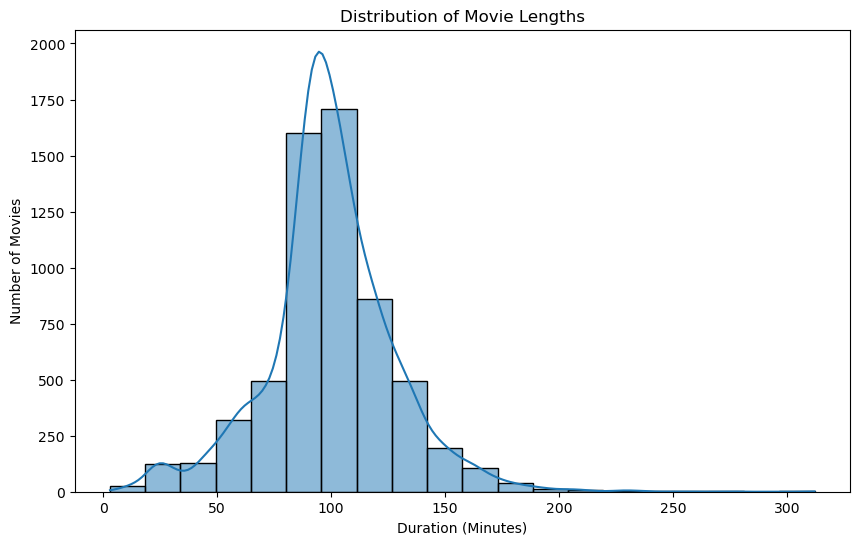

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


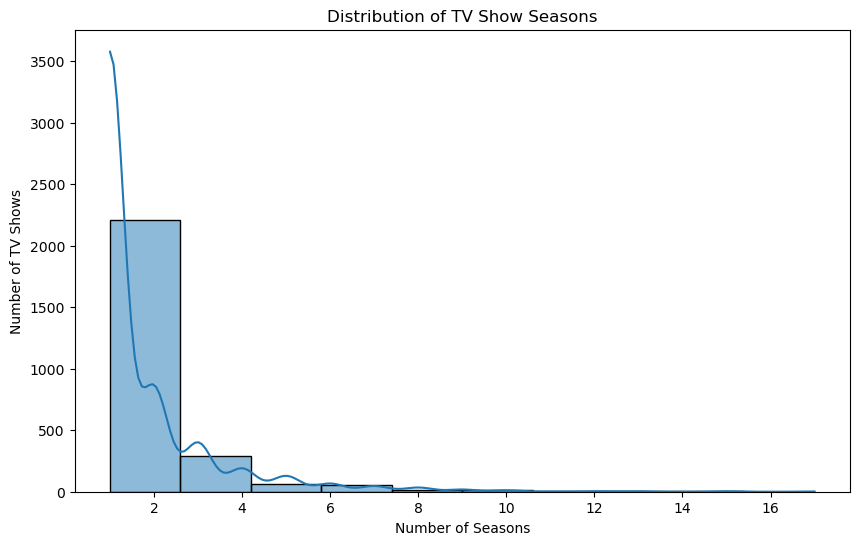

In [23]:
# Splitting the duration into numeric value and units (minutes or seasons)
netflix_data['duration_value'] = netflix_data['duration'].str.extract('(\d+)').astype(int)
netflix_data['duration_unit'] = netflix_data['duration'].str.extract('([a-zA-Z]+)')

# Plotting the distribution of movie lengths
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data[netflix_data['type'] == 'Movie']['duration_value'], bins=20, kde=True)
plt.title('Distribution of Movie Lengths')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.show()

# Plotting the distribution of TV show seasons
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data[netflix_data['type'] == 'TV Show']['duration_value'], bins=10, kde=True)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

### 3. **Top Lists and Recommendations: Identify Top-Rated Movies or TV Shows**
   - Since the dataset doesn't directly contain user ratings, you can create a top list based on other criteria such as popular genres or release year.

```python
# Identifying top-rated content based on recent release years
top_rated = netflix_data.sort_values(by='release_year', ascending=False).head(10)

# Displaying the top-rated content
top_rated[['title', 'release_year', 'rating', 'listed_in']]
```

In [24]:
# Identifying top-rated content based on recent release years
top_rated = netflix_data.sort_values(by='release_year', ascending=False).head(10)

# Displaying the top-rated content
top_rated[['title', 'release_year', 'rating', 'listed_in']]

,title,release_year,rating,listed_in
693,Ali & Ratu Ratu Queens,2021,TV-14,"Comedies, Dramas, International Movies"
781,Black Holes | The Edge of All We Know,2021,TV-14,Documentaries
762,Sweet & Sour,2021,TV-14,"Comedies, International Movies, Romantic Movies"
763,Sweet Tooth,2021,TV-14,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ..."
764,Trippin' with the Kandasamys,2021,TV-14,"Comedies, International Movies, Romantic Movies"
765,Xtreme,2021,TV-MA,"Action & Adventure, International Movies"
766,Alan Saldaña: Locked Up,2021,TV-MA,Stand-Up Comedy
767,Creator's File: GOLD,2021,TV-14,"International TV Shows, TV Comedies"
768,Dancing Queens,2021,TV-MA,"Comedies, Dramas, International Movies"
770,Myriam Fares: The Journey,2021,TV-14,"Documentaries, International Movies, Music & M..."


### 4. **Genre Trends: Analyze Trends in the Popularity of Different Genres Over Time**
   - Group by release year and genres to visualize trends over time.

```python
# Grouping by release year and genres
genre_trends = genres_data.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Plotting genre trends over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_trends, x='release_year', y='count', hue='genres')
plt.title('Trends in the Popularity of Different Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()
```

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


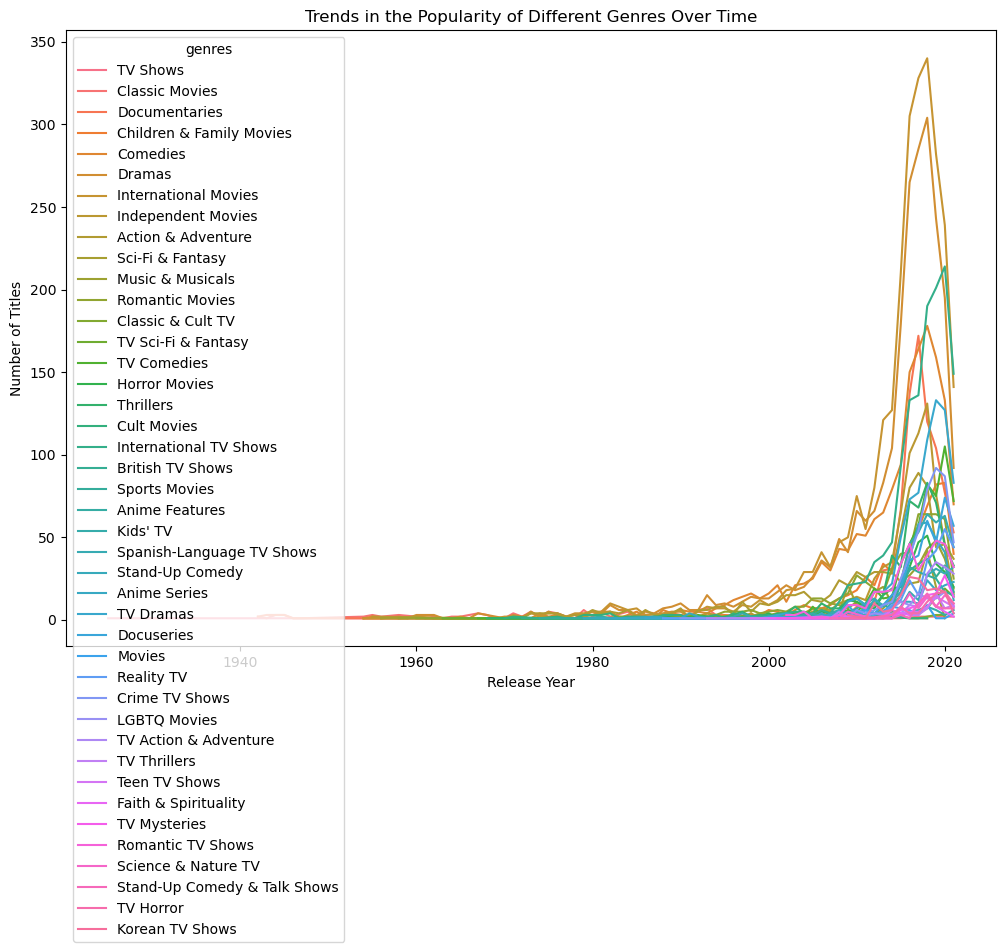

In [25]:
# Grouping by release year and genres
genre_trends = genres_data.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Plotting genre trends over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_trends, x='release_year', y='count', hue='genres')
plt.title('Trends in the Popularity of Different Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

### 1. **Geographical Analysis: Explore Distribution of Content Across Countries and Regions**
   - Create a bar plot to visualize the number of titles produced in different countries.
   - Focus on the top 10 countries.

```python
# Plotting the geographical distribution of content
plt.figure(figsize=(12, 8))
top_countries = netflix_data['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()
```

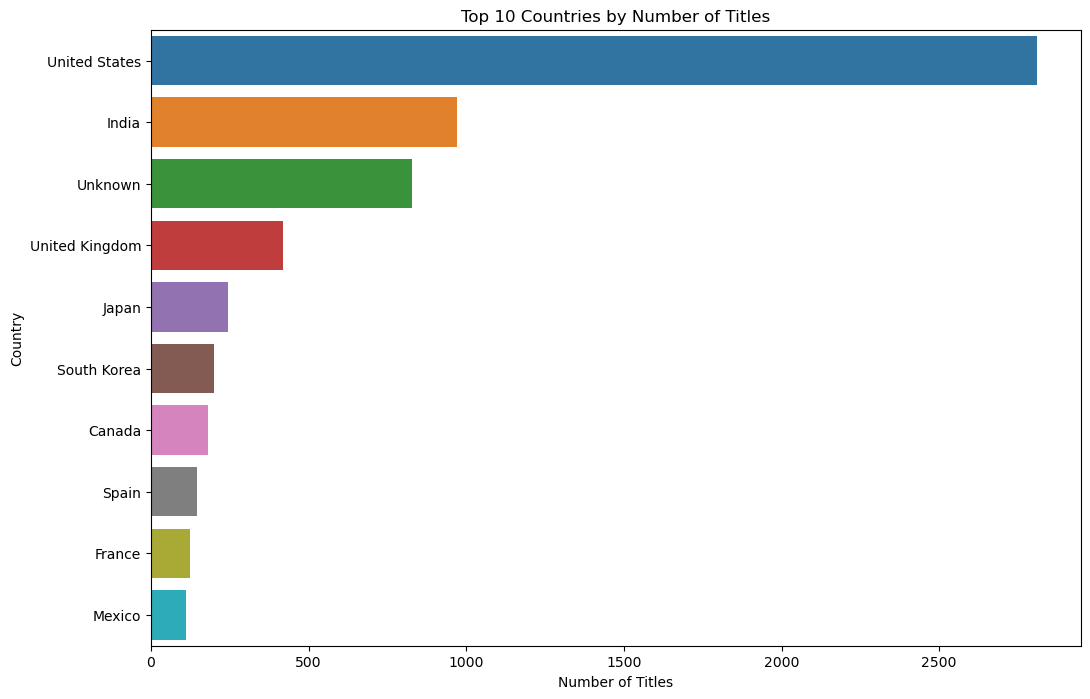

In [34]:
# Plotting the geographical distribution of content
plt.figure(figsize=(12, 8))
top_countries = netflix_data['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

### 2. **Correlation Analysis: Investigate Potential Correlations Between Variables**
   - Compute correlations between numerical variables, such as duration and release year.
   - Visualize the correlation matrix using a heatmap.

```python
# Encoding the duration values for correlation analysis
netflix_data['duration_numeric'] = pd.to_numeric(netflix_data['duration_value'], errors='coerce')

# Calculating the correlation matrix
correlation_matrix = netflix_data[['release_year', 'duration_numeric']].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
```

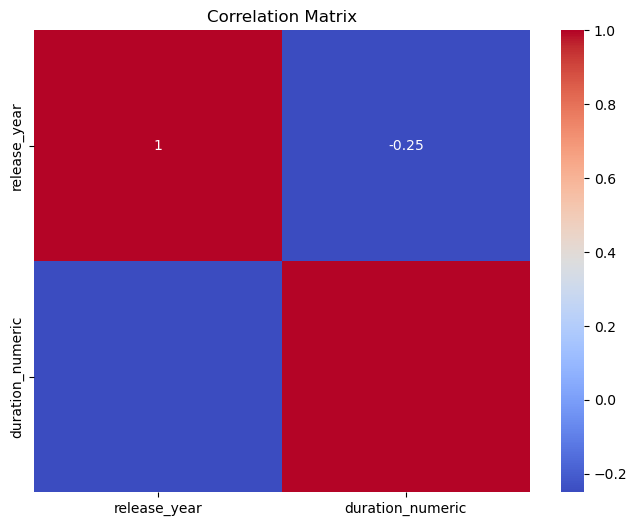

In [33]:
# Encoding the duration values for correlation analysis
netflix_data['duration_numeric'] = pd.to_numeric(netflix_data['duration_value'], errors='coerce')

# Calculating the correlation matrix
correlation_matrix = netflix_data[['release_year', 'duration_numeric']].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3. **Audience Engagement - Part 1: Analyze User Reviews and Sentiments**
   - Since the dataset doesn't include user reviews, assume that reviews are available in a separate dataset and perform sentiment analysis.

```python
# Assuming a separate dataset for reviews, perform sentiment analysis using libraries like nltk or TextBlob.
# Example sentiment analysis code:
from textblob import TextBlob

# Example reviews data
reviews = ["Amazing movie, highly recommended!", "Not worth watching", "Great acting, but weak storyline"]

# Analyzing sentiment for each review
sentiments = [TextBlob(review).sentiment.polarity for review in reviews]
sentiments  # Positive values indicate positive sentiment, and negative values indicate negative sentiment.
```

In [31]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   -------- ------------------------------- 133.1/626.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00


In [32]:
from textblob import TextBlob

# Example reviews data
reviews = ["Amazing movie, highly recommended!", "Not worth watching", "Great acting, but weak storyline"]

# Analyzing sentiment for each review
sentiments = [TextBlob(review).sentiment.polarity for review in reviews]

# Display the sentiment scores
print(sentiments)  # Positive values indicate positive sentiment, and negative values indicate negative sentiment.

[0.4, -0.15, 0.1416666666666667]


### 4. **Audience Engagement - Part 2: Explore User Engagement Metrics**
   - This requires engagement data like views or watch time, which isn't available in the current dataset. If such data were available, you could analyze it by plotting the distribution of views or watch time.

### 5. **Content Variety: Evaluate the Diversity of Content**
   - Count the number of unique genres and categories.

```python
# Counting the number of unique genres
unique_genres = netflix_data['listed_in'].str.split(', ').explode().nunique()

print(f'Total unique genres/categories: {unique_genres}')
```

In [29]:
# Counting the number of unique genres
unique_genres = netflix_data['listed_in'].str.split(', ').explode().nunique()

print(f'Total unique genres/categories: {unique_genres}')

Total unique genres/categories: 42




1. **Ensure `duration_numeric` Column is Created:**
   - Convert the `duration_value` column to numeric values.
   - Create the `duration_numeric` column.

2. **Plot Content Evolution Over Time:**
   - Group by `release_year` and calculate the average dudated code:

```python
# Ensure the duration column is correctly split into numeric values
netflix_data['duration_value'] = netflix_data['duration'].str.extract('(\d+)').astype(float)
netflix_data['duration_unit'] = netflix_data['duration'].str.extract('([a-zA-Z]+)')

# Use the duration_value column for analysis
netflix_data['duration_numeric'] = netflix_data['duration_value']

# Now, plot the content evolution over time
plt.figure(figsize=(10, 6))
avg_duration_per_year = netflix_data.groupby('release_year')['duration_numeric'].mean()
avg_duration_per_year.plot(kind='line')
plt.title('Average Content Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Duration, feel free to reach out again!

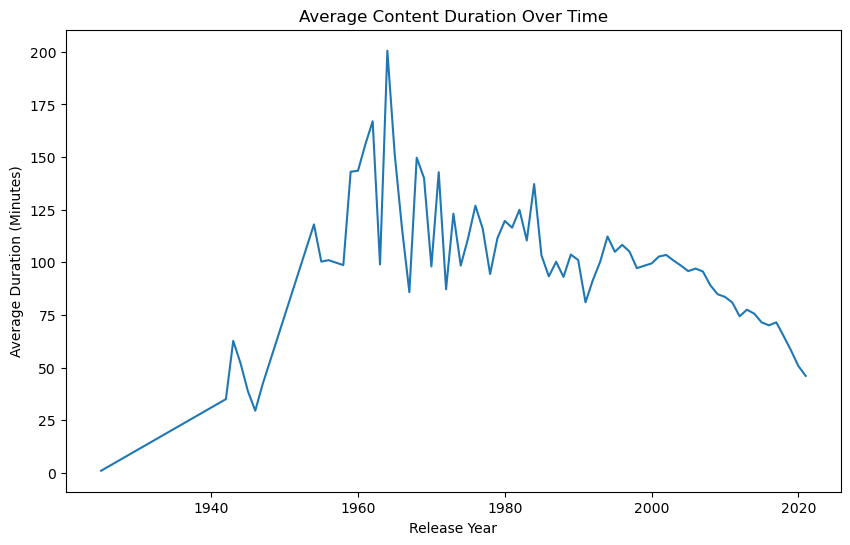

In [28]:
# Ensure the duration column is correctly split into numeric values
netflix_data['duration_value'] = netflix_data['duration'].str.extract('(\d+)').astype(float)
netflix_data['duration_unit'] = netflix_data['duration'].str.extract('([a-zA-Z]+)')

# Use the duration_value column for analysis
netflix_data['duration_numeric'] = netflix_data['duration_value']

# Now, plot the content evolution over time
plt.figure(figsize=(10, 6))
avg_duration_per_year = netflix_data.groupby('release_year')['duration_numeric'].mean()
avg_duration_per_year.plot(kind='line')
plt.title('Average Content Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

### 8. **User Preferences: Investigate Popular Genres**
   - Analyze which genres or types of content are more popular among users, possibly based on the number of titles.

```python
# Plotting the most popular genres
plt.figure(figsize=(10, 6))
popular_genres = genres_data['genres'].value_counts().head(10)
sns.barplot(y=popular_genres.index, x=popular_genres.values)
plt.title('Most Popular Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
```

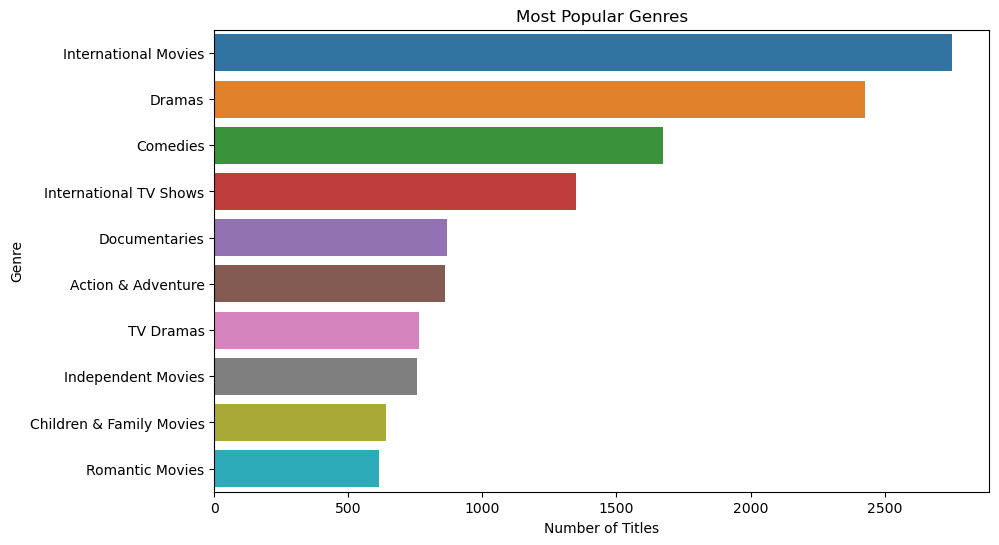

In [26]:
# Plotting the most popular genres
plt.figure(figsize=(10, 6))
popular_genres = genres_data['genres'].value_counts().head(10)
sns.barplot(y=popular_genres.index, x=popular_genres.values)
plt.title('Most Popular Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

### 9. **Conclusions and Recommendations: Summarize Findings**
   - After performing the analysis, summarize the key findings, trends, and patterns. Based on your findings, provide actionable recommendations for content creators, distributors, or streaming platforms.

### Example Summary:
- **Key Findings:**
  - **Genre Trends:** International TV Shows and Documentaries are among the most popular genres on Netflix.
  - **Geographical Distribution:** The majority of content comes from the United States, followed by India and the UK.
  - **Content Evolution:** The average duration of movies has remained relatively consistent, while TV shows tend to have fewer seasons in recent years.
  
- **Recommendations:**
  - **For Creators:** Focus on producing content in trending genres such as International TV Shows and Documentaries.
  - **For Platforms:** Increase the variety of content from emerging countries to diversify the library.
  - **For Users:** Explore content from less popular genres and countries to discover hidden gems.